<a href="https://colab.research.google.com/github/shreyash18g/Brain_Tumor_Classification_app/blob/main/Brain_tumor_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import time
import imutils
import os

In [3]:
import os  # Importing the OS module to interact with the file system

# Define the folder path where the files are located
folder = r"/content/drive/MyDrive/brain_tumor_dataset/yes"
count = 1  # Initialize a counter to create unique filenames

# List all files in the specified directory
files = os.listdir(folder)

# Print the list of files for debugging purposes
print("Files in directory:", files)

# Loop through each file in the directory
for filename in files:
    # Construct the full file path for the source file
    source = os.path.join(folder, filename)
    # Construct the new file path with a prefixed filename and incremented count
    destination = os.path.join(folder, "Y_" + str(count) + ".jpg")

    # Print the source and destination paths for each file to be renamed
    print("Renaming:", source, "to", destination)

    try:
        # Attempt to rename the file
        os.rename(source, destination)
        # Increment the counter after successful rename
        count += 1
    except FileNotFoundError as e:
        # Catch and print an error if the file is not found
        print(f"File not found: {source}")
        print(e)

# Print a confirmation message after all files have been renamed
print("All files have been renamed in the 'yes' directory.")


Files in directory: ['Y105.jpg', 'Y106.jpg', 'Y114.JPG', 'Y111.JPG', 'Y104.jpg', 'Y103.jpg', 'Y100.JPG', 'Y112.JPG', 'Y117.JPG', 'Y108.jpg', 'Y102.jpg', 'Y107.jpg', 'Y11.jpg', 'Y113.JPG', 'Y109.JPG', 'Y115.JPG', 'Y101.jpg', 'Y10.jpg', 'Y116.JPG', 'Y1.jpg', 'Y146.JPG', 'Y161.JPG', 'Y147.JPG', 'Y13.jpg', 'Y164.JPG', 'Y148.JPG', 'Y12.jpg', 'Y163.JPG', 'Y16.JPG', 'Y14.jpg', 'Y154.jpg', 'Y158.JPG', 'Y15.jpg', 'Y162.jpg', 'Y156.JPG', 'Y120.JPG', 'Y165.JPG', 'Y160.JPG', 'Y153.jpg', 'Y166.JPG', 'Y157.JPG', 'Y155.JPG', 'Y159.JPG', 'Y21.jpg', 'Y182.JPG', 'Y18.JPG', 'Y185.jpg', 'Y180.jpg', 'Y188.jpg', 'Y170.JPG', 'Y22.jpg', 'Y187.jpg', 'Y20.jpg', 'Y184.JPG', 'Y17.jpg', 'Y24.jpg', 'Y181.jpg', 'Y23.JPG', 'Y183.jpg', 'Y169.jpg', 'Y194.jpg', 'Y193.JPG', 'Y192.JPG', 'Y167.JPG', 'Y2.jpg', 'Y19.JPG', 'Y186.jpg', 'Y195.JPG', 'Y168.jpg', 'Y259.JPG', 'Y258.JPG', 'Y249.JPG', 'Y257.jpg', 'Y26.jpg', 'Y243.JPG', 'Y254.jpg', 'Y28.jpg', 'Y245.jpg', 'Y255.JPG', 'Y248.JPG', 'Y251.JPG', 'Y29.jpg', 'Y244.JPG', 'Y253

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os  # Importing the OS module to handle file operations

# Specify the directory containing the files to be renamed
folder = r"/content/drive/MyDrive/brain_tumor_dataset/no"
count = 1  # Initialize a counter for the new filenames

# Retrieve a list of all files in the specified directory
files = os.listdir(folder)

# Output the list of files for debugging purposes
print("Files in directory:", files)

# Iterate over each file in the directory
for filename in files:
    # Create the full path for the current file
    source = os.path.join(folder, filename)
    # Define the new path with the updated filename
    destination = os.path.join(folder, "N_" + str(count) + ".jpg")

    # Print the source and destination paths for tracking
    print("Renaming:", source, "to", destination)

    try:
        # Attempt to rename the file
        os.rename(source, destination)
        # Increment the counter for the next filename
        count += 1
    except FileNotFoundError as e:
        # Handle the case where the file was not found
        print(f"File not found: {source}")
        print(e)

# Confirm that all files have been renamed
print("All files have been renamed in the 'no' directory.")


Files in directory: ['1 no.jpeg', '12 no.jpg', '11 no.jpg', '13 no.jpg', '10 no.jpg', '23 no.jpg', '4 no.jpg', '31 no.jpg', '29 no.jpg', '41 no.jpg', '26 no.jpg', '17 no.jpg', '21 no.jpg', '20 no.jpg', '22 no.jpg', '40 no.jpg', '25 no.jpg', '30 no.jpg', '27 no.jpg', '34 no.jpg', '2 no.jpeg', '32 no.jpg', '14 no.jpg', '35 no.jpg', '3 no.jpg', '36 no.jpg', '38 no.jpg', '24 no.jpg', '37 no.jpg', '33 no.jpg', '19 no.jpg', '18 no.jpg', '15 no.jpg', '28 no.jpg', '39 no.jpg', '45 no.jpg', '49 no.jpg', 'N11.jpg', '7 no.jpg', '43 no.jpg', 'No11.jpg', 'N19.JPG', 'N17.jpg', 'N22.JPG', 'No13.jpg', 'N26.JPG', '6 no.jpg', '42 no.jpg', 'N2.JPG', '9 no.jpg', '48 no.jpeg', '50 no.jpg', 'N16.jpg', 'N3.jpg', 'N6.jpg', 'N15.jpg', 'N5.jpg', 'No12.jpg', '8 no.jpg', '47 no.jpg', '44no.jpg', '5 no.jpg', '46 no.jpg', 'N20.JPG', 'N21.jpg', 'N1.JPG', 'No14.jpg', 'no 3.jpg', 'no 923.jpg', 'No21.jpg', 'no 91.jpeg', 'No15.jpg', 'no 94.jpg', 'No16.jpg', 'no 100.jpg', 'no 7.jpeg', 'No20.jpg', 'no 90.jpg', 'no 10.jpg'

In [5]:
# Define the path for the directory containing positive examples
positive_examples_dir = r"/content/drive/MyDrive/brain_tumor_dataset/yes"

# Get a list of all files in the positive examples directory
positive_examples_files = os.listdir(positive_examples_dir)

# Count the number of positive example files
num_positive_examples = len(positive_examples_files)
print(f"Number of positive examples: {num_positive_examples}")

# Define the path for the directory containing negative examples
negative_examples_dir = r"/content/drive/MyDrive/brain_tumor_dataset/no"

# Get a list of all files in the negative examples directory
negative_examples_files = os.listdir(negative_examples_dir)

# Count the number of negative example files
num_negative_examples = len(negative_examples_files)
print(f"Number of negative examples: {num_negative_examples}")

Number of positive examples: 155
Number of negative examples: 98


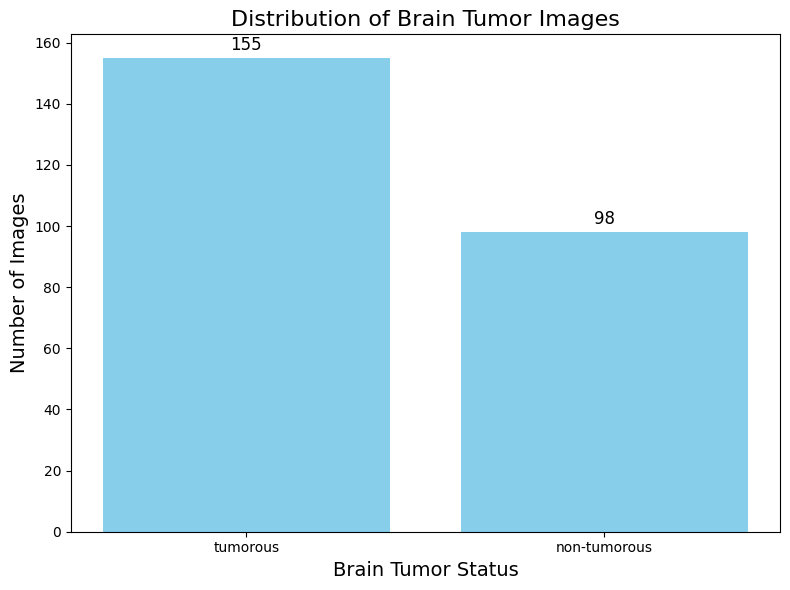

In [6]:
# Create a dictionary to store the counts of tumorous and non-tumorous examples
data = {'tumorous': num_positive_examples, 'non-tumorous': num_negative_examples}

# Get the keys (labels) and values (counts) from the data dictionary
data_labels = list(data.keys())
data_counts = list(data.values())

# Create a figure and adjust its size
fig = plt.figure(figsize=(8, 6))

# Create a bar plot with the labels and counts
bars = plt.bar(data_labels, data_counts, color='skyblue')

# Add labels and title to the plot
plt.xlabel("Brain Tumor Status", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Distribution of Brain Tumor Images", fontsize=16)

# Add value labels on top of each bar
for bar in bars:
   height = bar.get_height()
   plt.annotate(
       '{}'.format(height),
       xy=(bar.get_x() + bar.get_width() / 2, height),
       xytext=(0, 3),
       textcoords="offset points",
       ha='center',
       va='bottom',
       fontsize=12
   )

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
def timing(sec_elapsed):
   """
   Converts the elapsed time in seconds into a formatted string representation of hours, minutes, and seconds.

   Args:
       sec_elapsed (float): The elapsed time in seconds.

   Returns:
       str: A formatted string representing the elapsed time in the format "h:m:s".
   """
   # Calculate the number of hours
   hours = int(sec_elapsed // (60 * 60))

   # Calculate the remaining minutes
   minutes = int((sec_elapsed % (60 * 60)) // 60)

   # Calculate the remaining seconds
   seconds = sec_elapsed % 60

   # Format the time as a string
   formatted_time = f"{hours}:{minutes:02d}:{seconds:05.2f}"

   return formatted_time

In [8]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
   """
   Performs data augmentation on images in the specified directory and saves the augmented images to a new directory.

   Args:
       file_dir (str): The directory path containing the original images.
       n_generated_samples (int): The number of augmented images to generate for each original image.
       save_to_dir (str): The directory path to save the augmented images.

   Returns:
       None
   """

   os.makedirs(save_to_dir, exist_ok=True)
   # Create an instance of the ImageDataGenerator with various augmentation parameters
   data_gen = ImageDataGenerator(
       rotation_range=10,  # Rotate images by up to 10 degrees
       width_shift_range=0.1,  # Shift images horizontally by up to 10% of the image width
       height_shift_range=0.1,  # Shift images vertically by up to 10% of the image height
       shear_range=0.1,  # Apply shear transformation within the specified range
       brightness_range=(0.3, 1.0),  # Adjust brightness within the specified range
       horizontal_flip=True,  # Flip images horizontally
       vertical_flip=True,  # Flip images vertically
       fill_mode='nearest'  # Fill in new pixels using the nearest neighbor method
   )

   # Iterate over each image file in the specified directory
   for filename in os.listdir(file_dir):
       image_path = os.path.join(file_dir, filename)
       image = cv2.imread(image_path)

       # Skip if the image cannot be read
       if image is None:
           print(f"Failed to read image: {image_path}")
           continue

       # Reshape the image for compatibility with the ImageDataGenerator
       image = image.reshape((1,) + image.shape)

       # Generate a prefix for the augmented image filenames
       save_prefix = 'aug_' + os.path.splitext(filename)[0]
       i = 0

       # Generate augmented images using the ImageDataGenerator
       for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
           i += 1
           if i >= n_generated_samples:
               break

In [9]:
# Record the start time
start_time = time.time()

# Define the paths for the original data directories
yes_path = r"/content/drive/MyDrive/brain_tumor_dataset/yes"
no_path = r"/content/drive/MyDrive/brain_tumor_dataset/no"

augmented_data_path = 'augmented_data/'

# Create the augmented data directory if it doesn't exist
os.makedirs(augmented_data_path, exist_ok=True)

# Generate augmented data for the positive (tumorous) examples
augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=os.path.join(augmented_data_path, 'yes_'))

# Generate augmented data for the negative (non-tumorous) examples
augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=os.path.join(augmented_data_path, 'no_'))

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 140.80 seconds


In [10]:
def data_summary(main_path):
    """
    Prints a summary of the data distribution in the augmented data directories.

    Args:
        main_path (str): The main directory path containing the 'yes_' and 'no_' subdirectories.

    Returns:
        None
    """
    # Define the paths for the augmented data directories
    yes_path = os.path.join(main_path, "yes_")
    no_path = os.path.join(main_path, "no_")

    # Count the number of positive and negative examples
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    # Calculate the total number of examples
    n = (n_pos + n_neg)

    # Calculate the percentage of positive and negative examples
    pos_per = (n_pos * 100) / n
    neg_per = (n_neg * 100) / n

    # Print the summary
    print(f"Number of samples: {n}")
    print(f"{n_pos} Number of positive samples in percentage: {pos_per:.2f}%")
    print(f"{n_neg} Number of negative samples in percentage: {neg_per:.2f}%")

In [11]:
data_summary(augmented_data_path)

Number of samples: 1811
930 Number of positive samples in percentage: 51.35%
881 Number of negative samples in percentage: 48.65%


In [14]:
# Define the paths for the augmented data directories
yes_path = "augmented_data/yes_/"
no_path = "augmented_data/no_/"

# Get a list of all files in the positive examples directory
positive_examples_files = os.listdir(yes_path)

# Count the number of positive example files
num_positive_examples = len(positive_examples_files)
print(f"Number of positive examples: {num_positive_examples}")

# Get a list of all files in the negative examples directory
negative_examples_files = os.listdir(no_path)

# Count the number of negative example files
num_negative_examples = len(negative_examples_files)
print(f"Number of negative examples: {num_negative_examples}")

Number of positive examples: 930
Number of negative examples: 881


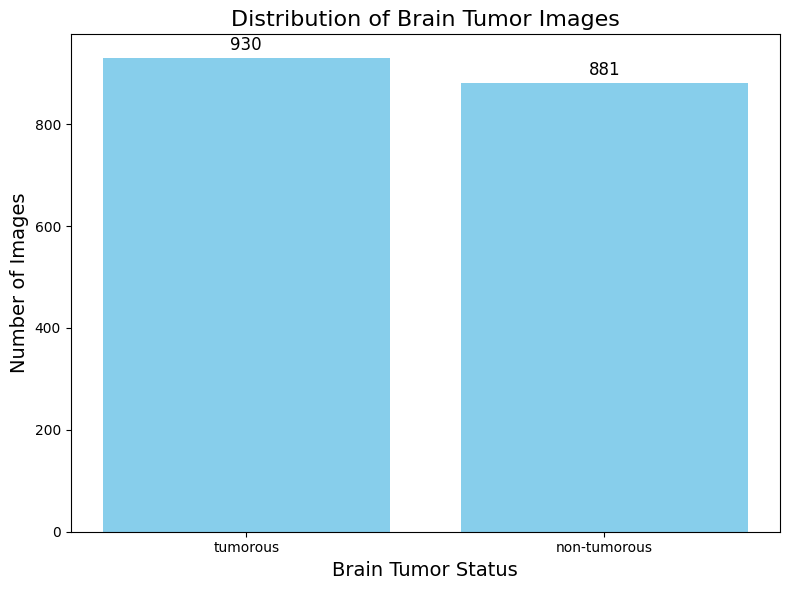

In [15]:
# Assuming number_files_yes and number_files_no are defined and contain the respective counts

# Create a dictionary to store the counts of tumorous and non-tumorous examples
data = {'tumorous': num_positive_examples, 'non-tumorous': num_negative_examples}

# Get the keys (labels) and values (counts) from the data dictionary
data_labels = list(data.keys())
data_counts = list(data.values())

# Create a figure and adjust its size
fig = plt.figure(figsize=(8, 6))

# Create a bar plot with the labels and counts
bars = plt.bar(data_labels, data_counts, color='skyblue')

# Add labels and title to the plot
plt.xlabel("Brain Tumor Status", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Distribution of Brain Tumor Images", fontsize=16)

# Add value labels on top of each bar
for bar in bars:
   height = bar.get_height()
   plt.annotate(
       '{}'.format(height),
       xy=(bar.get_x() + bar.get_width() / 2, height),
       xytext=(0, 3),
       textcoords="offset points",
       ha='center',
       va='bottom',
       fontsize=12
   )

# Adjust the layout and display the plot"
plt.tight_layout()
plt.show()

In [16]:
def crop_brain_tumor(image, plot=False):
   """
   Crops the brain tumor region from the given image.

   Args:
       image (numpy.ndarray): The input image containing the brain tumor.
       plot (bool, optional): If True, displays the original and cropped images. Defaults to False.

   Returns:
       numpy.ndarray: The cropped image containing the brain tumor region.
   """
   # Convert the image to grayscale
   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

   # Apply Gaussian blur to reduce noise
   gray = cv2.GaussianBlur(gray, (5, 5), 0)

   # Apply thresholding to obtain a binary image
   _, thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)

   # Erode and dilate the binary image to remove small holes and gaps
   thres = cv2.erode(thres, None, iterations=2)
   thres = cv2.dilate(thres, None, iterations=2)

   # Find contours in the binary image
   cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   cnts = imutils.grab_contours(cnts)

   # Find the largest contour, which represents the brain tumor region
   c = max(cnts, key=cv2.contourArea)

   # Find the extreme points of the contour
   extLeft = tuple(c[c[:, :, 0].argmin()][0])
   extRight = tuple(c[c[:, :, 0].argmax()][0])
   extTop = tuple(c[c[:, :, 1].argmin()][0])
   extBot = tuple(c[c[:, :, 1].argmax()][0])

   # Crop the image to the brain tumor region
   new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

   # Plot the original and cropped images if requested
   if plot:
       plt.figure()
       plt.subplot(1, 2, 1)
       plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
       plt.tick_params(axis='both', which='both',
                       top=False, bottom=False, left=False, right=False,
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
       plt.title('Original Image')

       plt.subplot(1, 2, 2)
       plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
       plt.tick_params(axis='both', which='both',
                       top=False, bottom=False, left=False, right=False,
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
       plt.title('Cropped Image')
       plt.show()

   return new_image

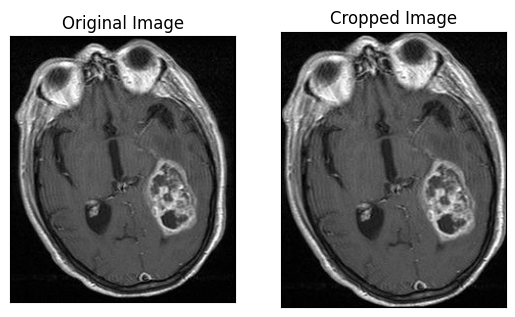

array([[[5, 5, 5],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [5, 5, 5],
        [1, 1, 1],
        [4, 4, 4]],

       [[6, 6, 6],
        [5, 5, 5],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [4, 4, 4]],

       [[7, 7, 7],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[3, 3, 3],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [4, 4, 4],
        [4, 4, 4]],

       [[3, 3, 3],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [4, 4, 4],
        [4, 4, 4]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [2, 2, 2]]], dtype=uint8)
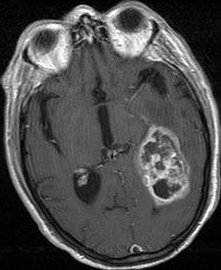

In [17]:
img = cv2.imread(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y_107.jpg")
crop_brain_tumor(img,True)

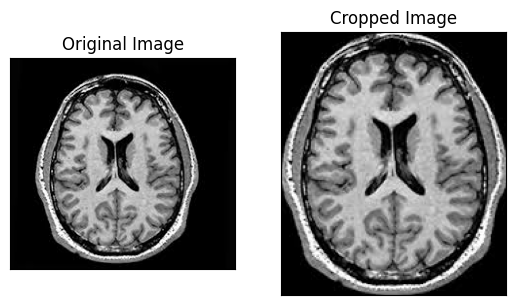

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
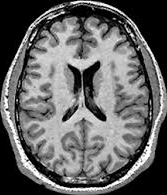

In [18]:
img = cv2.imread(r"/content/drive/MyDrive/brain_tumor_dataset/no/N_17.jpg")
crop_brain_tumor(img, True)

In [19]:
# Define the paths for the augmented data directories
folder1 = 'augmented_data/no_/'
folder2 = 'augmented_data/yes_/'

# Iterate over the files in the 'no_' directory
for filename in os.listdir(folder1):
   # Read the image
   img_path = os.path.join(folder1, filename)
   img = cv2.imread(img_path)

   # Crop the brain tumor region
   cropped_img = crop_brain_tumor(img, False)

   # Save the cropped image
   cv2.imwrite(img_path, cropped_img)

# Iterate over the files in the 'yes_' directory
for filename in os.listdir(folder2):
   # Read the image
   img_path = os.path.join(folder2, filename)
   img = cv2.imread(img_path)

   # Crop the brain tumor region
   cropped_img = crop_brain_tumor(img, False)

   # Save the cropped image
   cv2.imwrite(img_path, cropped_img)

In [20]:
def load_data(dir_list, image_size):
   """
   Loads and preprocesses the brain tumor images from the specified directories.

   Args:
       dir_list (list): A list of directory paths containing the brain tumor images.
       image_size (tuple): A tuple specifying the desired width and height of the output images.

   Returns:
       tuple: A tuple containing two numpy arrays:
           X (numpy.ndarray): The preprocessed images.
           y (numpy.ndarray): The corresponding labels (1 for tumorous, 0 for non-tumorous).
   """
   X = []
   y = []

   image_width, image_height = image_size

   for directory in dir_list:
       for filename in os.listdir(directory):
           # Read the image
           image_path = os.path.join(directory, filename)
           image = cv2.imread(image_path)

           # Crop the brain tumor region
           image = crop_brain_tumor(image, plot=False)

           # Resize the image
           image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)

           # Normalize the pixel values
           image = image / 255.0

           # Append the image and label to the respective lists
           X.append(image)
           if directory[-3:] == "yes_":
               y.append(1)
           else:
               y.append(0)

   # Convert the lists to numpy arrays
   X = np.array(X)
   y = np.array(y)

   # Shuffle the data
   X, y = shuffle(X, y)

   # Print the data summary
   print(f"Number of examples: {len(X)}")
   print(f"X shape: {X.shape}")
   print(f"y shape: {y.shape}")

   return X, y

In [21]:
from sklearn.utils import shuffle

# Define the path for the augmented data directory
augmented_path = 'augmented_data/'

# Construct the paths for the augmented data subdirectories
augmented_yes = os.path.join(augmented_path, 'yes_')
augmented_no = os.path.join(augmented_path, 'no_')

# Define the desired image dimensions
IMAGE_WIDTH, IMAGE_HEIGHT = (240, 240)

# Load and preprocess the data
X, y = load_data([augmented_yes, augmented_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of examples: 1811
X shape: (1811, 240, 240, 3)
y shape: (1811,)


In [22]:
def plot_sample_images(X, y, n=50):
   """
   Plots sample images from the given dataset.

   Args:
       X (numpy.ndarray): The image data.
       y (numpy.ndarray): The corresponding labels.
       n (int, optional): The number of sample images to plot for each label. Defaults to 50.

   Returns:
       None
   """
   for label in [0, 1]:
       # Select images with the current label
       images = X[np.argwhere(y == label)]
       n_images = images[:n]

       # Calculate the number of rows and columns for the subplot grid
       columns_n = 10
       rows_n = int(n / columns_n)
       plt.figure(figsize=(20, 10))

       i = 1
       for image in n_images:
           # Plot the image in the current subplot
           plt.subplot(rows_n, columns_n, i)
           plt.imshow(image[0], cmap='gray')

           # Remove axis ticks and labels
           plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

           i += 1

       # Set the title for the current label
       label_to_str = lambda label: "Yes" if label == 1 else "No"
       plt.suptitle(f"Brain Tumor: {label_to_str(label)}", fontsize=16)
       plt.show()

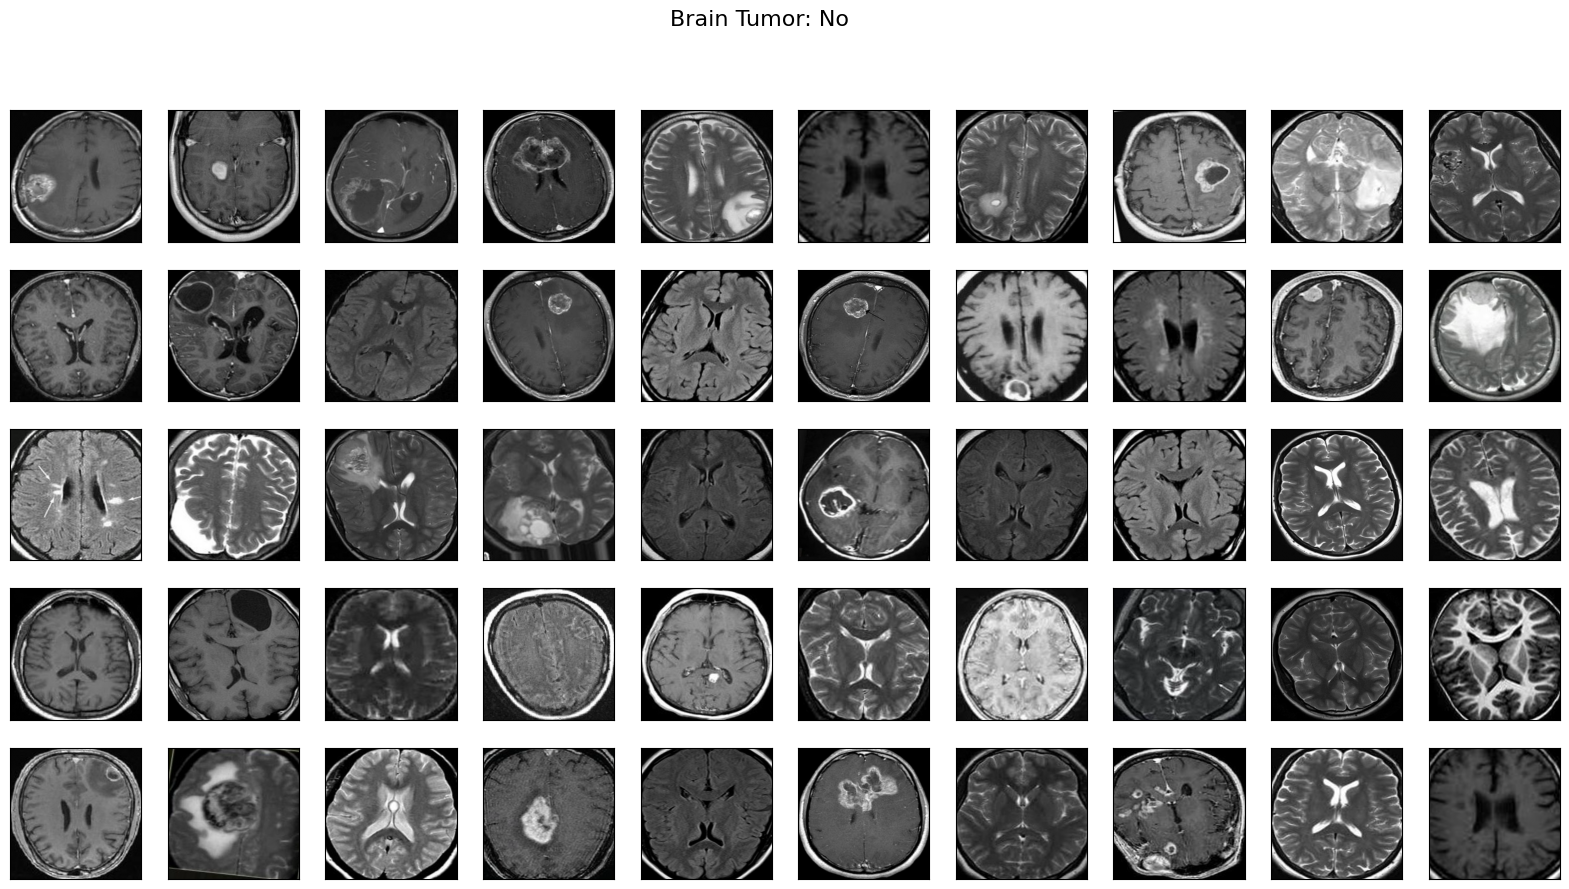

<Figure size 2000x1000 with 0 Axes>

In [23]:
plot_sample_images(X,y)

In [24]:
# Define the base directory where the dataset is stored

# This directory contains subdirectories for different classes of images (e.g., 'tumorous', 'nontumorous')

if not os.path.isdir('tumorous_and_nontumorous'):
    dataset_base_directory = 'tumorous_and_nontumorous'
    os.mkdir(dataset_base_directory)

In [25]:
# Define directories for training, testing, and validation datasets


if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(dataset_base_directory , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(dataset_base_directory , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(dataset_base_directory , 'valid')
    os.mkdir(valid_dir)

In [26]:
# Define directories for tumorous images in the training, testing, and validation datasets


if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [27]:
# Define directories for healthy (non-tumorous) images in training, testing, and validation sets

if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [28]:
# Define directories for original tumorous and non-tumorous datasets

original_dataset_tumorous = os.path.join('augmented_data','yes_/')

original_dataset_nontumorous = os.path.join('augmented_data','no_/')

In [29]:
# Get list of filenames in the tumorous augmented dataset

files = os.listdir('augmented_data/yes_/')

# Initialize list to store filenames
fnames = []

# Iterate over the first 744 filenames and append them to the list
for i in range(0,744):
    fnames.append(files[i])

# Copy tumorous images to the infected training directory
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
# Get list of filenames in the tumorous augmented dataset
files = os.listdir('augmented_data/yes_/')

# Initialize list to store filenames
fnames = []

# Iterate over filenames from index 744 to 836 and append them to the list
for i in range(744, 837):
    fnames.append(files[i])

# Copy tumorous images to the infected test directory
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
# Get list of filenames in the tumorous augmented dataset
files = os.listdir('augmented_data/yes_/')

# Initialize list to store filenames
fnames = []

# Iterate over filenames from index 837 to 929 and append them to the list
for i in range(837, 930):
    fnames.append(files[i])

# Copy tumorous images to the infected validation directory
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
# Get list of filenames in the non-tumorous augmented dataset
files = os.listdir('augmented_data/no_/')

# Initialize list to store filenames
fnames = []

# Iterate over the first 704 filenames and append them to the list
for i in range(0, 705):
    fnames.append(files[i])

# Copy non-tumorous images to the healthy training directory
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
# Get list of filenames in the non-tumorous augmented dataset
files = os.listdir('augmented_data/no_/')

# Initialize list to store filenames
fnames = []

# Iterate over filenames from index 704 to 791 and append them to the list
for i in range(705, 793):
    fnames.append(files[i])

# Copy non-tumorous images to the healthy test directory
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

In [34]:
# Get list of filenames in the non-tumorous augmented dataset
files = os.listdir('augmented_data/no_/')

# Initialize list to store filenames
fnames = []

# Iterate over filenames from index 792 to 881 and append them to the list
for i in range(793, 881):
    fnames.append(files[i])

# Copy non-tumorous images to the healthy validation directory
for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)


In [35]:
# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=0.4,
    vertical_flip=0.4,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.4,
    height_shift_range=0.4,
    fill_mode='nearest'
)

# Data generator for testing images
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# Data generator for validation images
valid_datagen = ImageDataGenerator(
    rescale=1.0/255
)

In [36]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    'tumorous_and_nontumorous/train/',
    batch_size=32,
    target_size=(240, 240),
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

Found 1449 images belonging to 2 classes.


In [37]:
# Test data generator
test_generator = test_datagen.flow_from_directory(
    'tumorous_and_nontumorous/test/',
    batch_size=32,
    target_size=(240, 240),
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

Found 181 images belonging to 2 classes.


In [38]:
# Validation data generator
valid_generator = valid_datagen.flow_from_directory(
    'tumorous_and_nontumorous/valid/',
    batch_size=32,
    target_size=(240, 240),
    class_mode='categorical',
    shuffle=True,
    seed=42,
    color_mode='rgb'
)

Found 181 images belonging to 2 classes.


In [39]:
# Get class indices from the training generator
class_labels = train_generator.class_indices

# Create a dictionary to map class indices to class names
class_name = {value: key for key, value in class_labels.items()}

In [40]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [41]:
# Load pre-trained VGG19 model without the top layers
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the model
model_01 = Model(base_model.input, output)

# Display model summary
model_01.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                              

In [42]:
# Filepath for saving the model
filepath = 'model.keras'

# Early stopping to prevent overfitting
es = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    mode='min',
    patience=4
)

# Model checkpoint to save the best model
cp = ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

# Reduce learning rate when a metric has stopped improving
lrr = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)


In [46]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay


# Define the exponential decay schedule
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Define SGD optimizer with the learning rate schedule
sgd = SGD(
    learning_rate=lr_schedule,
    momentum=0.9,
    nesterov=True
)

# Compile the model
model_01.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)


In [48]:
# Train the model
history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator
)

Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 0.7230 - accuracy: 0.5125
Epoch 1: val_loss improved from inf to 0.69752, saving model to model.keras
10/10 [==============================] - 21s 2s/step - loss: 0.7230 - accuracy: 0.5125 - val_loss: 0.6975 - val_accuracy: 0.5525 - lr: 1.0000e-04
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 0.7065 - accuracy: 0.5375
Epoch 2: val_loss improved from 0.69752 to 0.67618, saving model to model.keras
10/10 [==============================] - 16s 2s/step - loss: 0.7065 - accuracy: 0.5375 - val_loss: 0.6762 - val_accuracy: 0.5801 - lr: 1.0000e-04
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.6031
Epoch 3: val_loss improved from 0.67618 to 0.67019, saving model to model.keras
10/10 [==============================] - 23s 2s/step - loss: 0.6634 - accuracy: 0.6031 - val_loss: 0.6702 - val_accuracy: 0.5525 - lr: 1.0000e-04
Epoch 4/5
10/10 [==============================

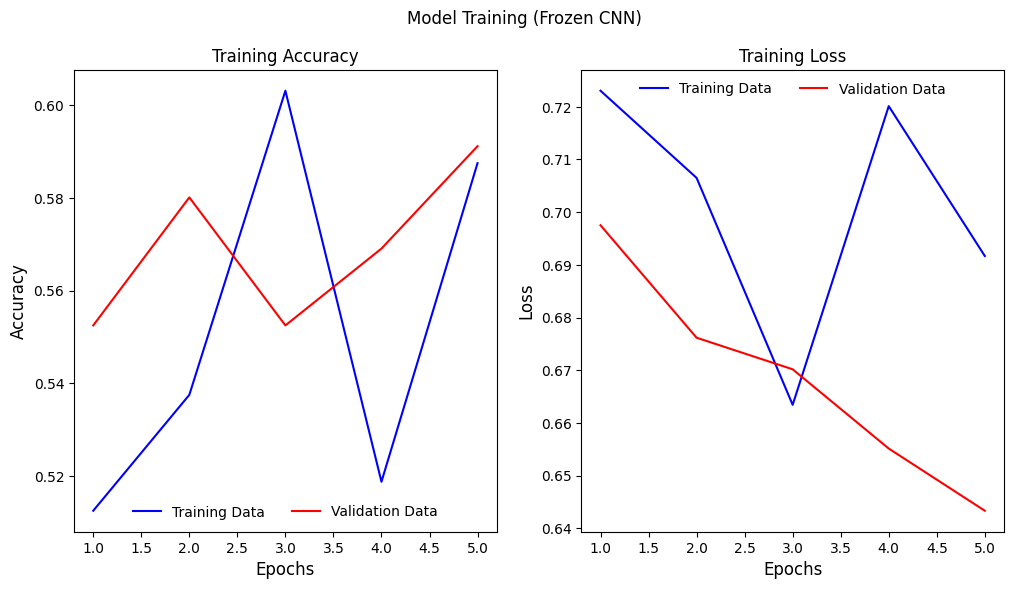

In [49]:
# Plot performance
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)

# Get the maximum epoch
max_epoch = len(history_01.history['accuracy']) + 1
epochs_list = list(range(1, max_epoch))

# Plot training and validation accuracy
ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

# Plot training and validation loss
ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)

# Save the plot
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')


In [50]:
# Check if directory for model weights exists, if not create it
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save model weights
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)


In [51]:
# Load model weights
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")

# Evaluate the model on validation data
vgg_val_eval_01 = model_01.evaluate(valid_generator)

# Evaluate the model on test data
vgg_test_eval_01 = model_01.evaluate(test_generator)

6/6 [==============================] - 1s 168ms/step - loss: 0.6717 - accuracy: 0.5801


In [52]:
# Print validation loss and accuracy
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Accuracy: {vgg_val_eval_01[1]}')

# Print test loss and accuracy
print(f'Test Loss: {vgg_test_eval_01[0]}')
print(f'Test Accuracy: {vgg_test_eval_01[1]}')


Validation Loss: 0.6433494687080383
Validation Accuracy: 0.591160237789154
Test Loss: 0.6716662049293518
Test Accuracy: 0.580110490322113


In [53]:
# Get filenames and number of samples in test generator
filenames = test_generator.filenames
nb_samples = len(filenames)

# Predict classes for test data
vgg_prediction_01 = model_01.predict(test_generator, steps=nb_samples, verbose=1)

# Get predicted labels
y_pred = np.argmax(vgg_prediction_01, axis=1)


  6/181 [..............................] - ETA: 30s

181/181 [==============================] - 1s 6ms/step


In [54]:
# Load VGG19 base model without top layers
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

# Get the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names


['input_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [55]:
# Load VGG19 base model without top layers
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

# Get names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the model
model_02 = Model(base_model.inputs, output)

# Load weights from previous model
model_02.load_weights('model_weights/vgg19_model_01.weights.h5')

# Set trainable layers
set_trainable = False
for layer in base_model.layers:
    if layer.name in ['block5_conv4', 'block5_conv3']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Print model summary
print(model_02.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [56]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the exponential decay schedule
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Define SGD optimizer with the learning rate schedule
sgd = SGD(
    learning_rate=lr_schedule,
    momentum=0.9,
    nesterov=True
)

# Compile the model
model_02.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)


In [57]:
# Train the model
history_02 = model_02.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator
)


Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5781
Epoch 1: val_loss improved from 0.64335 to 0.63478, saving model to model.keras
10/10 [==============================] - 22s 2s/step - loss: 0.6854 - accuracy: 0.5781 - val_loss: 0.6348 - val_accuracy: 0.6298 - lr: 1.0000e-04
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 0.6670 - accuracy: 0.6062
Epoch 2: val_loss improved from 0.63478 to 0.62552, saving model to model.keras
10/10 [==============================] - 27s 3s/step - loss: 0.6670 - accuracy: 0.6062 - val_loss: 0.6255 - val_accuracy: 0.6409 - lr: 1.0000e-04
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 0.6600 - accuracy: 0.6094
Epoch 3: val_loss did not improve from 0.62552
10/10 [==============================] - 8s 800ms/step - loss: 0.6600 - accuracy: 0.6094 - val_loss: 0.6285 - val_accuracy: 0.6409 - lr: 1.0000e-04
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 0.6517 

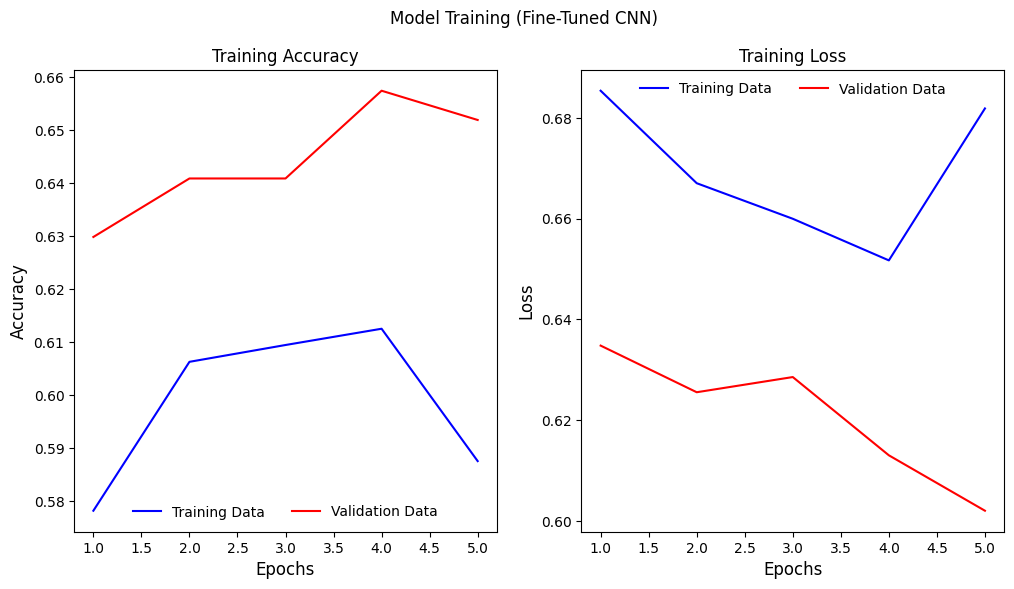

In [58]:
# Plot performance
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model Training (Fine-Tuned CNN)", fontsize=12)

# Get the maximum epoch
max_epoch = len(history_02.history['accuracy']) + 1
epochs_list = list(range(1, max_epoch))

# Plot training and validation accuracy
ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

# Plot training and validation loss
ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)

# Save the plot
plt.savefig("training_finetuned_cnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')


In [59]:
# Create the directory if it doesn't exist
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save model weights with the correct filename extension
try:
    model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)
    print("Weights saved successfully.")
except ValueError as e:
    print(f"Error: {e}")


Weights saved successfully.


In [60]:
# Load model weights
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")

# Evaluate the model on validation data
vgg_val_eval_02 = model_02.evaluate(valid_generator)

# Evaluate the model on test data
vgg_test_eval_02 = model_02.evaluate(test_generator)


6/6 [==============================] - 1s 166ms/step - loss: 0.6347 - accuracy: 0.6354


In [61]:
# Load VGG19 base model without top layers
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

# Get names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Create the model
model_03 = Model(base_model.inputs, output)

# Load weights from previous model
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')


# Define the exponential decay schedule
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Define SGD optimizer with the learning rate schedule
sgd = SGD(
    learning_rate=lr_schedule,
    momentum=0.9,
    nesterov=True
)

# Compile the model
model_03.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)


In [62]:
model_03.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0   

In [63]:
# Train the model
history_03 = model_03.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=2,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator
)

Epoch 1/2
10/10 [==============================] - ETA: 0s - loss: 0.6199 - accuracy: 0.6566
Epoch 1: val_loss did not improve from 0.60199
10/10 [==============================] - 29s 1s/step - loss: 0.6199 - accuracy: 0.6566 - val_loss: 0.6173 - val_accuracy: 0.6298 - lr: 1.0000e-04
Epoch 2/2
10/10 [==============================] - ETA: 0s - loss: 0.6484 - accuracy: 0.5825
Epoch 2: val_loss did not improve from 0.60199
10/10 [==============================] - 9s 891ms/step - loss: 0.6484 - accuracy: 0.5825 - val_loss: 0.6184 - val_accuracy: 0.6464 - lr: 1.0000e-04


In [65]:
# Load model weights
model_03.load_weights("/content/drive/MyDrive/vgg_unfrozen.h5")

# Evaluate the model on validation data
vgg_val_eval_03 = model_03.evaluate(valid_generator)

# Evaluate the model on test data
vgg_test_eval_03 = model_03.evaluate(test_generator)


6/6 [==============================] - 1s 161ms/step - loss: 0.0950 - accuracy: 0.9448
